# Lesson 4. Convolutional Neural Networks

This lesson will cover the basics of Convolutional Neural Networks (CNNs), which is a very important concept in today's technologies. Before explaining what a CNN is, we must give some context.

## 4.1. Concepts

As shown in the previous lesson, this image shows that Deep Learning is one of the newest concepts in Artificial Intelligence.

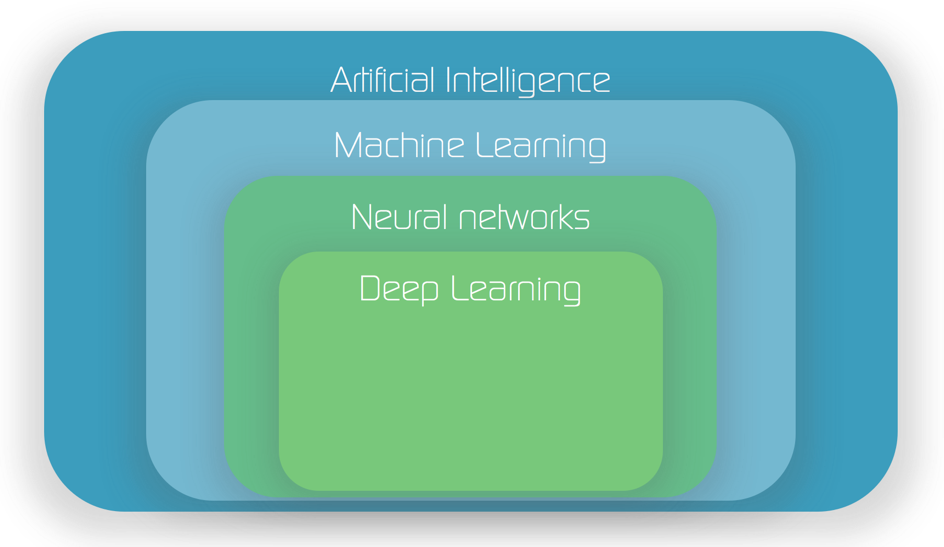

Image source: https://www.bambu.life/blog/2019/2/26/how-machine-learning-is-changing-software-development

### 4.1.1. Deep Learning (DL)

Deep Learning models are an evolution of the ANN. The adjective "deep" in deep learning refers to the use of multiple layers in the network. With this multilayer, it can make more complex classifications like the examples that we are going to see.

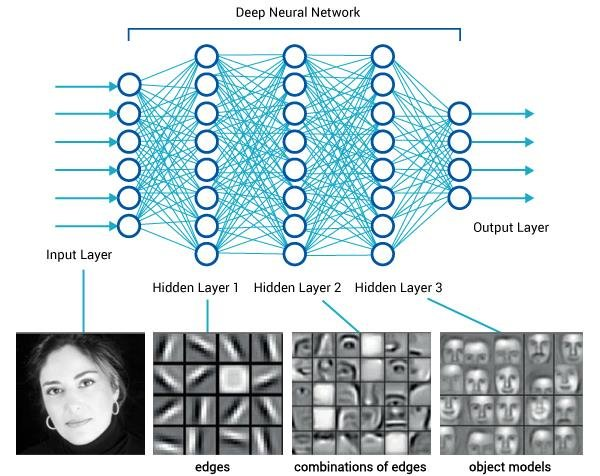

Image source: https://medium.com/diaryofawannapreneur/deep-learning-for-computer-vision-for-the-average-person-861661d8aa61

### 4.1.2. Convolutional Neural Networks (CNNs)

They are generally used for image recognition problems because they can detect patterns in the images using filters in the first layers.

These are one of the many architectures that Deep Learning has to offer. It is a class of ANN and often used to classify images. They are based on the shared-weight architecture of the convolution kernels or filters that slide along input features and provide translation equivalent responses known as feature maps. These weights are in each neuron which just modifies the output of a value, and they change through the training process to optimize the result (minimize the error).

For the exercises we will use the keras library offered by the tensorflow library. With these we can build and train models for image recognition. These are some of the layers keras has to offer:

#### **Conv2D**
This is one of the layers that makes a Neural Network a Convolutional Neural Network. For the first filters, this layer uses filters to detect patterns in the pixels, then summarizes the result in a feature map. I will explain a few parameters but check the [documentation](https://keras.io/api/layers/convolution_layers/convolution2d/):
* **filters**: the first parameter, is the number of the filters to use in that layer. Remember that the filters are there to find small patterns, sometimes it will be good to have just a few filters like 16 and sometimes more will be better, like 64.
* **kernel_size**: the size of the window that checks for patterns, this window moves around the image and makes the calculation within that area. You can specify a single value (2) or height and width (2,2). This values generally vary from 3 to 6, but it depends on if it does a better job with that size or not.
* **activation**: It is the function related to the activation of the neuron. One of the famous functions is the *Sigmoid* function but most neural network use the *relu* function. 
* **input_shape**: The size and color channel of the image expected if our image is an RGB with 32x32 we should put (32,32,3) if it is a gray scale 28x28 (28,28,1) the last parameter is the dimensionality of the color.

#### **MaxPooling2D**
It solves the problem of identifying the same pattern in different positions by the convolutional layers. The "max" type of pooling uses the max value of the window that goes through feature map. For more info check the [documentation](https://keras.io/api/layers/pooling_layers/max_pooling2d/).

* **pool_size**: The size of the window that goes through the feature map to obtain the max value of, for example a (2,2).

#### **Dropout**
The dropout layer is made to disconnect randomly some connections of neurons to make it harder for the neural network to learn, making it more robust.

* **rate**: It is the percentage of connections to disconnect. Goes from 0 to 1. If you set it to 1 it disconnects all the connections in that layer, if 0, none.

#### **Flatten**
In order to go through the Dense layer, we have to flatten the data.

#### **Dense**
The dense layer can be put at the end of the model to make the final estimation, to decide the category of the input given. It can also be put before this last dense layer to do a selection of which connections that come from the feature detection layers are relevant and passes to the next.

* **units**: It has to be a positive integer which is the dimensionality of the output space. If we have 10 types of images we would put 10.

### 4.1.3. Overfitting

Overfitting is when our neural network trains too much and only learns to make very good predictions on the dataset with whom it has trained. This is not good because it will not do well with other data, that's why we use the validation dataset, to check in each epoch if the neural network is doing well and also why we have the test dataset (in this examples we don't use it) at the end of the training to see if the finished neural network does well on data that it has never seen.

## 4.2. Examples

I will explain the code of a CNN tutorial that classifies images of digits by Jason Brownlee in [this tutorial](https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/).

### Example 1. Load the Data

Using the *keras* library we can get a few datasets to work with. Is as easy as using the method *load_data* that returns two training arrays and two test arrays, both with images and labels.

In [ ]:
from tensorflow import keras
from keras.datasets import mnist
#load mnist dataset
(X_train, y_train), (X_val, y_val) = mnist.load_data()

Plotting the images is very important to know what we are working with. We will use the *pyplot* library with the method *figure*.

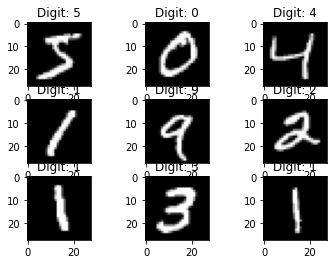

In [ ]:
import matplotlib.pyplot as plt
# We especify to plot a figure
fig = plt.figure()
for i in range(9):
    # in each iteration we especify the position with subplot
    plt.subplot(3,3,i+1)
    # We show the correct image in gray scale
    plt.imshow(X_train[i], cmap='gray')
    # We put a title with the correct label
    plt.title("Digit: {}".format(y_train[i]))

* In ``` plt.subplot(3,3,i+1) ``` we especify the position in the figure, the first two parameters especify the dimensions of the frame to put in (3x3) and the third one is the position (in this case from 1 to 9 (it doesn't take in count the position zero).
* ``` plt.imshow(X_train[i], ``` is displaying the image in the especified position and with ```cmap='gray')``` sets the color map to gray, printing in gray scale.
* ```plt.title("Digit: {}".format(y_train[i]))``` just puts a title above with the label

### Example 2. Transform the data 

The keras' neural networks needs the data to be transformed in a certain way. We will apply a few transformations.

The images are arrays of number. It contains an array of arrays, this array contains 28 arrays (rows), each one of them has 28 items with values (column of row, pixel) from 0 to 255 to represent the gray level in that pixel.

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Because the data type is an integer and the keras neural networks work with float32 type we convert it.

Also is better for the neural network to work with values between 0 and 1 instead of 0 to 255.

In [ ]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_val /= 255
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28)

X_train shape: (60000, 28, 28)


Now our images are values from 0 to 1 in float32 type (you can see the type at the end of the printed array)

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Because the model needs so, we add the color channel, if it were a RGB channel, the value would be three (three dimensions for Red, Green and Blue), but it is a gray scale, so it only has one dimension

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_val = X_val.reshape(10000, 28, 28, 1)
print('X_train shape:', X_train.shape) #X_train shape: (60000, 28, 28, 1)

X_train shape: (60000, 28, 28, 1)


Now our shape has that 1 at the end. And each pixel is not an individual value but a array that only contains the value of the pixel. It may not make any sense to transform the array like that but the neural network is made to accept RGB images so it needs to be estructured like that to accept a three value pixel (red, green and blue)

In [ ]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

Because our prediction data type is categorical (labels, not numeric values) we need to reflect that in the data type by transforming it using the keras' method *to_categorical*.

Right now our label is just a number:

In [ ]:
y_train[0]

5

But the format that keras wants is an array of length 10 composed by 0s and 1s, each position represent a label and if it has a 1 or 0 it means that that image corresponds to that label or not.

In [ ]:
# set number of categories
num_category = 10
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_category)
y_val = keras.utils.to_categorical(y_val, num_category)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Example 3. Build the model

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
#model building
model = Sequential()
#convolutional layer with rectified linear unit activation
model.add(Conv2D(filters=32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
#32 convolution filters used each of size 3x3
#again
model.add(Conv2D(64, (3, 3), activation='relu'))
#64 convolution filters used each of size 3x3
#choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
#randomly turn neurons on and off to improve convergence
model.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
model.add(Flatten())
#fully connected to get all relevant data
model.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
model.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
model.add(Dense(num_category, activation='softmax'))

### Example 4. Compile the model

The compilation especifies how to measure the loss and how the model has to learn.

In [ ]:
#Adaptive learning rate (adaDelta) is a popular form of gradient descent rivaled only by adam and adagrad
#categorical ce since we have multiple classes (10) 
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

### Example 5. Train the model

With the method *fit* we finally train the model we built and compiled. It needs:
* the **images** to train with.
* the **labels** to train with.
* the **batch_size** which is the number of images that the neural network will train within each epoch (iteration). If we have 1000 images and the batch size is 100 it will take the first one hundred in the first iteration, the second hundreds in the second and so on...
* **epochs** are how many iterations it has to make when training. If you set it to 5, it will train 5 times with the number of images you set it with.
* the **verbose** parameter is just to tell the neural network what information to display during the training.
* **validation data** are the images and labels that the neural network will test within each iteration.

In [ ]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/10
469/469 [==============================] - 8s 16ms/step - loss: 2.2774 - accuracy: 0.1611 - val_loss: 2.2404 - val_accuracy: 0.3383
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 2.2190 - accuracy: 0.2630 - val_loss: 2.1677 - val_accuracy: 0.4826
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 2.1442 - accuracy: 0.3478 - val_loss: 2.0715 - val_accuracy: 0.5912
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 2.0437 - accuracy: 0.4257 - val_loss: 1.9432 - val_accuracy: 0.6443
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 1.9150 - accuracy: 0.4916 - val_loss: 1.7796 - val_accuracy: 0.7010
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 1.7585 - accuracy: 0.5464 - val_loss: 1.5876 - val_accuracy: 0.7383
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 1.5893 - accuracy: 0.5889 - val_loss: 1.3851 - val_accuracy: 0.7629

### Example 6. Display the training process

We can extract from the model log how the accuracy did in each epoch.

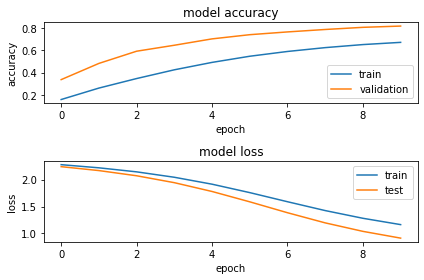

In [ ]:
import os
# especifies the first to plot in a 2x1 frame
plt.subplot(2,1,1)
# the measure to plot, the accuracy and the validation accuracy
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('model accuracy')
# the axis x and y for the accuracy and the epochs
plt.ylabel('accuracy')
plt.xlabel('epoch')
# the legend for the train and validation accuracy
plt.legend(['train', 'validation'], loc='lower right')

# especifies the second to plot in a 2x1 frame
plt.subplot(2,1,2)
# the measure to plot, the loss and the validation loss
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
# the axis x and y for the loss and the epochs
plt.ylabel('loss')
plt.xlabel('epoch')
# the legend for the train and validation loss
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

We can see that with just 10 epochs our model did pretty well, going from 0.2 to 0.8 in accuracy and 2.2 to less than 1 in loss. We also don't want to have the train and validation result distant from each other because if we obtain a train value much better than the validation one it can mean that our neural network is only learning to predict well the training dataset and can't extrapolate to other images.

## 4.3. Final Exercise

### Exercise 1. Load the Data

Load the data from the *keras.datasets.mnist* library with the method *load_data* and obtain the X_train, y_train, X_test, y_test from the *data* and *taget*

In [ ]:
# Get the data


In [ ]:
(X_train, y_train), (X_val, y_val) = mnist.load_data()

### Exercise 2. Transform the data 

Transform the data. X_train and X_val to type float32 and divide by 255.

In [ ]:
# Transform the train data


In [ ]:
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_val /= 255

Add the dimension color by reshaping to (size, 28, 28, 1) X_train and X_val.

In [ ]:
# reshape X_train and X_val


In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_val = X_val.reshape(10000, 28, 28, 1)

Convert the y data to catgeorical using the *keras.utils* *to_categorical* function

In [ ]:
# convert the y data to categorical


In [ ]:
num_category = 10
y_train = keras.utils.to_categorical(y_train, num_category)
y_val = keras.utils.to_categorical(y_val, num_category)

### Exercise 3. Build the model

Build the sequential model:
* Conv2D: units=32, kernel_size=(3,3), activation=(determine it), input_shape=(determine it)
* Conv2D: units=64, kernel_size=(3,3), activation=(determine it)
* MaxPooling2D: pool_size=(determine it)
* Dropout: rate=(determine it)
* Flatten
* Dense: units=(determine it), activation=(determine it)
* Dropout: rate=(determine it)
* Dense: units=(determine it), activation=softmax

In [ ]:
# Build the model


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_category, activation='softmax'))

### Exercise 4. Compile the model

Compile the model:
* loss= (determine it)
* optimizer= adadelta

In [ ]:
# compile the model


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

### Exercise 5. Train the model

Train the model with validation data:
* batch_size=(determine it)
* epochs=(determine it)

In [ ]:
# train the model

In [ ]:
batch_size = 128
num_epoch = 10
model_log = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=(X_val, y_val))

Epoch 1/10
469/469 [==============================] - 8s 16ms/step - loss: 2.2897 - accuracy: 0.1580 - val_loss: 2.2672 - val_accuracy: 0.2366
Epoch 2/10
469/469 [==============================] - 7s 15ms/step - loss: 2.2521 - accuracy: 0.2419 - val_loss: 2.2210 - val_accuracy: 0.3849
Epoch 3/10
469/469 [==============================] - 7s 15ms/step - loss: 2.2031 - accuracy: 0.3305 - val_loss: 2.1586 - val_accuracy: 0.4829
Epoch 4/10
469/469 [==============================] - 7s 15ms/step - loss: 2.1365 - accuracy: 0.4136 - val_loss: 2.0733 - val_accuracy: 0.5675
Epoch 5/10
469/469 [==============================] - 7s 15ms/step - loss: 2.0467 - accuracy: 0.4758 - val_loss: 1.9574 - val_accuracy: 0.6447
Epoch 6/10
469/469 [==============================] - 7s 15ms/step - loss: 1.9257 - accuracy: 0.5285 - val_loss: 1.8033 - val_accuracy: 0.6921
Epoch 7/10
469/469 [==============================] - 7s 15ms/step - loss: 1.7743 - accuracy: 0.5677 - val_loss: 1.6128 - val_accuracy: 0.7308

### Exercise 6. Display the training process

Plot the accuracy and loss. For each plot
* Use a subplot of (2,1,1)
* Plot with the accuracy & val_accuracy (for accuracy) and loss & val_loss (for loss) from the model log history
* There is no need for titles

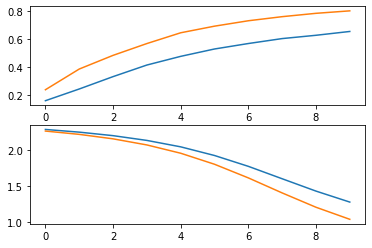

In [ ]:
plt.subplot(2,1,1)
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])